In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
training_set = "Lab01-Data/lab1_Ex3_data/lab1_Ex3_train.csv"
test_set = "Lab01-Data/lab1_Ex3_data/lab1_Ex3_test.csv"

In [2]:
training_data_frame = pd.read_csv(training_set)
test_data_frame = pd.read_csv(test_set)
train_data = [data[0:2] for data in training_data_frame.values]
train_label = np.array([data[2] for data in training_data_frame.values])
test_data = np.array(test_data_frame.values)
print(train_data)
print(train_label)
print(test_data)

[array([14, 39], dtype=int64), array([27, 36], dtype=int64), array([38, 81], dtype=int64), array([35, 67], dtype=int64), array([18, 32], dtype=int64), array([23, 31], dtype=int64), array([38, 81], dtype=int64), array([31, 48], dtype=int64), array([32, 54], dtype=int64), array([22, 31], dtype=int64), array([12,  4], dtype=int64), array([39, 26], dtype=int64), array([36,  6], dtype=int64), array([10,  7], dtype=int64), array([13,  5], dtype=int64), array([18,  9], dtype=int64), array([11,  6], dtype=int64), array([13,  5], dtype=int64), array([29, 15], dtype=int64), array([17,  7], dtype=int64)]
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2]
[[22 32]
 [37 42]
 [29 29]
 [38 48]
 [17 66]
 [17 37]
 [20 66]
 [11 65]
 [24 77]
 [21 42]]


In [3]:
def bayes(train_data, train_label, test_data):
    class_1 = []
    class_2 = []
    num_class_1 = 0.0
    num_class_2 = 0.0
    for i in range(len(train_data)):
        if train_label[i] == 1:
            class_1.append(train_data[i])
            num_class_1 += 1
        else:
            class_2.append(train_data[i])
            num_class_2 += 1
    p_1 = num_class_1/len(train_label)
    p_2 = num_class_2/len(train_label)
    # print(np.array(class_1).shape)
    mean_class_1 = np.mean(np.array(class_1), axis=0)
    mean_class_2 = np.mean(np.array(class_2),axis=0)
    var_class_1 = np.var(np.array(class_1),axis=0)
    var_class_2 = np.var(np.array(class_2),axis=0)
    std_class_1 = np.std(np.array(class_1),axis=0)
    std_class_2 = np.std(np.array(class_2),axis=0)
    def get_prob_1(data):
        return  np.exp(-np.power((data-mean_class_1),2)/(2*var_class_1))/(np.sqrt(2*np.pi)*std_class_1)
    def get_prob_2(data):
        return np.exp(-np.power((data-mean_class_2),2)/(2*var_class_2))/(np.sqrt(2*np.pi)*std_class_2)
    test_label = []
    for data in test_data:
        data = np.array(data)
        # p_list_1 是 P(feature1|class1), P(feature1|class1)
        p_list_1 = get_prob_1(data)
        p_list_2 = get_prob_2(data)
        if p_1*p_list_1[0]*p_list_1[1] > p_2*p_list_2[0]*p_list_2[1]:
            # print(abs(p_1*p_list_1[0]*p_list_1[1] - p_2*p_list_2[0]*p_list_2[1]))
            test_label.append(1)
        else:
            test_label.append(2)
    # print(test_label)
    return np.array(test_label)
output_dict = {}
output_dict['Q1'] = bayes
bayes(train_data, train_label, test_data)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [4]:
training_error = bayes(train_data, train_label, train_data) - train_label
print(training_error)
print(abs(training_error).sum())
output_dict['Q2'] = abs(training_error).sum()/len(train_data)
output_dict['Q3'] = np.sort(bayes(train_data, train_label, test_data))
print(output_dict['Q2'])
print(output_dict['Q3'])

[ 0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0]
1
0.05
[1 1 1 1 1 1 1 1 1 1]


In [5]:
# feature的分布在0~100间，遍历整个空间求得boundry
boundry = []
def bayes_for_Q4(train_data, train_label, test_data):
    class_1 = []
    class_2 = []
    num_class_1 = 0.0
    num_class_2 = 0.0
    for i in range(len(train_data)):
        if train_label[i] == 1:
            class_1.append(train_data[i])
            num_class_1 += 1
        else:
            class_2.append(train_data[i])
            num_class_2 += 1
    p_1 = num_class_1/len(train_label)
    p_2 = num_class_2/len(train_label)
    # print(np.array(class_1).shape)
    mean_class_1 = np.mean(np.array(class_1), axis=0)
    mean_class_2 = np.mean(np.array(class_2),axis=0)
    var_class_1 = np.var(np.array(class_1),axis=0)
    var_class_2 = np.var(np.array(class_2),axis=0)
    std_class_1 = np.std(np.array(class_1),axis=0)
    std_class_2 = np.std(np.array(class_2),axis=0)
    def get_prob_1(data):
        return  np.exp(-np.power((data-mean_class_1),2)/(2*var_class_1))/(np.sqrt(2*np.pi)*std_class_1)
    def get_prob_2(data):
        return np.exp(-np.power((data-mean_class_2),2)/(2*var_class_2))/(np.sqrt(2*np.pi)*std_class_2)
    prob = []
    for data in test_data:
        # p_list_1 是 P(feature1|class1), P(feature1|class1)
        p_list_1 = get_prob_1(data)
        p_list_2 = get_prob_2(data)
        prob.append([p_1*p_list_1[0]*p_list_1[1]-p_2*p_list_2[0]*p_list_2[1]])
    return prob
      

In [6]:
class_1 = []
class_2 = []
num_class_1 = 0.0
num_class_2 = 0.0
for i in range(len(train_data)):
    if train_label[i] == 1:
        class_1.append(train_data[i])
        num_class_1 += 1
    else:
        class_2.append(train_data[i])
        num_class_2 += 1
p_1 = num_class_1/len(train_label)
p_2 = num_class_2/len(train_label)
class_1_x = [data[0] for data in class_1]
class_1_y = [data[1] for data in class_1]
class_2_x = [data[0] for data in class_2]
class_2_y = [data[1] for data in class_2]
test_x = [data[0] for data in test_data]
test_y  = [data[1] for data in test_data]
# prepare meshgrid
x_min, x_max = np.array(train_data)[:, 0].min() -1 , np.array(train_data)[:, 0].max()
y_min, y_max = np.array(train_data)[:, 1].min() -1 , np.array(train_data)[:, 1].max()
h = 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.array(bayes_for_Q4(train_data, train_label, np.c_[xx.ravel(), yy.ravel()]))

10


[12, 39, 36, 10, 13, 18, 11, 13, 29, 17]
[4, 26, 6, 7, 5, 9, 6, 5, 15, 7]


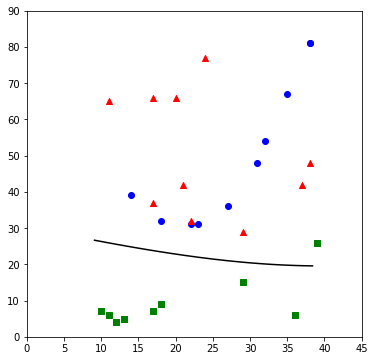

In [10]:
print(class_2_x)
print(class_2_y)
fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
Z = Z.reshape(xx.shape)
# 只画一条最低的等高线（也就是两者概率相差最小的那条线，即边界）
ax.contour(xx, yy, Z,levels=0,colors='k')
plt.scatter(class_1_x, class_1_y, marker='o', c='b')
plt.scatter(class_2_x, class_2_y, marker='s', c='g')
plt.scatter(test_x, test_y, marker='^', c='r')
plt.xlim(0, 45)
plt.ylim(0, 90)
plt.show()